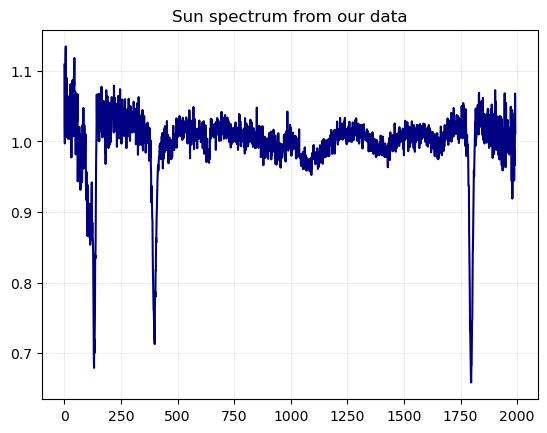

In [9]:
import numpy as np
from matplotlib.pyplot import figure, show, close
from scipy.optimize import curve_fit

sun_data = np.loadtxt("flatlined/Flatlined_Regulus.txt", comments="#")

fig = figure()
frame = fig.add_subplot(1, 1, 1)
frame.plot(sun_data, color="navy", label="Vega spectrum")
frame.set_title("Sun spectrum from our data")
frame.grid(alpha=0.2)
show()
close(fig)

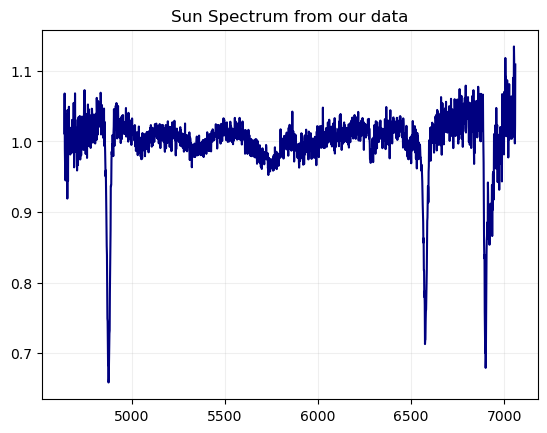

In [10]:
x_range = np.arange(0, np.size(sun_data))
x_range_a = x_range*-1.217+7060

fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(x_range_a,sun_data,color="navy", label="Arcturus spectrum")
frame.set_title("Sun Spectrum from our data")
frame.grid(alpha=0.2)
show()
close(fig)

[array([-2.00e-01,  4.88e+03,  5.00e+00]), array([-2.00e-01,  6.55e+03,  5.00e+00]), array([-2.0e-01,  6.9e+03,  5.0e+00])]
Parameters: [-3.42119701e-01  4.87326033e+03  7.68997802e+00 -2.67187674e-01
  6.57608770e+03  9.63615802e+00 -1.97603191e-01  6.90912676e+03
  1.57743288e+01  1.00872301e+00]
Gaussian parameters: [[-3.42119701e-01  4.87326033e+03  7.68997802e+00]
 [-2.67187674e-01  6.57608770e+03  9.63615802e+00]
 [-1.97603191e-01  6.90912676e+03  1.57743288e+01]]


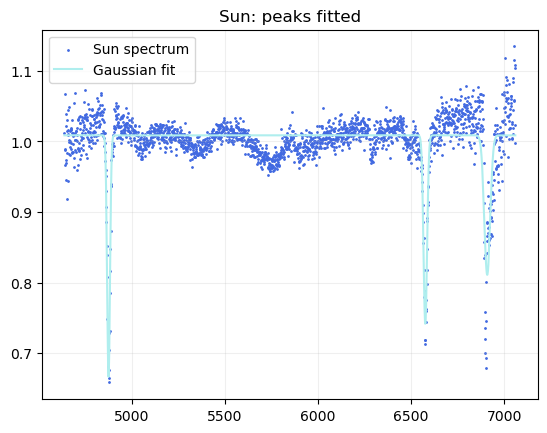

In [11]:
def f_superior(x, *params):
    """Returns a combination of multiple Gaussians plotted on a straight line"""
    num_gaussians = (len(params)-1) // 3
    y = np.zeros_like(x, dtype=float) #it was having some weird type issues
    for i in range(num_gaussians):
        a = params[3 * i]
        m = params[3 * i + 1]
        s = params[3 * i + 2]
        y += a * np.exp(-(x - m) ** 2 / (2.0 * s ** 2))
    z = params[-1:]
    y+=z
    return y

D1=np.array([-0.2,4880,5])
D2=np.array([-0.2,6550,5]) #Na I
D3 = np.array([-0.2,6900,5]) #?

initial_gaussians = [D1, D2, D3]
print(initial_gaussians)
initial_guess = [item for sublist in initial_gaussians for item in sublist] + [1]

beta, pcov = curve_fit(f_superior, x_range_a, sun_data, p0=initial_guess)
print("Parameters:", beta) #it's not printing the figure if i remove this line, no idea why

# extracting the fitted parameters
num_gaussians = len(initial_gaussians)
gaussian_params = beta[:num_gaussians * 3].reshape((num_gaussians, 3))
z = beta[-1]

# poor attempt at error analysis
err=np.sqrt(np.diag(pcov))
fwhm_err=2*err[2]*np.sqrt(2*np.log(2))

print("Gaussian parameters:", gaussian_params)

# plotting the final fit
fig = figure()
frame = fig.add_subplot(1, 1, 1)
frame.scatter(x_range_a, sun_data, color="royalblue", label="Sun spectrum", s=1)
frame.plot(x_range_a, f_superior(x_range_a, *beta), color="paleturquoise", label="Gaussian fit")
frame.set_title("Sun: peaks fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)

[18.10851438 22.69141805 37.14570566]
H-beta peak equivalent width: 18.108514382528206
H-alpha peak equivalent width: 22.69141805481524
Oxygen peak equivalent width: 37.14570565737046
Error in FWHMs: 0.5563474394724631


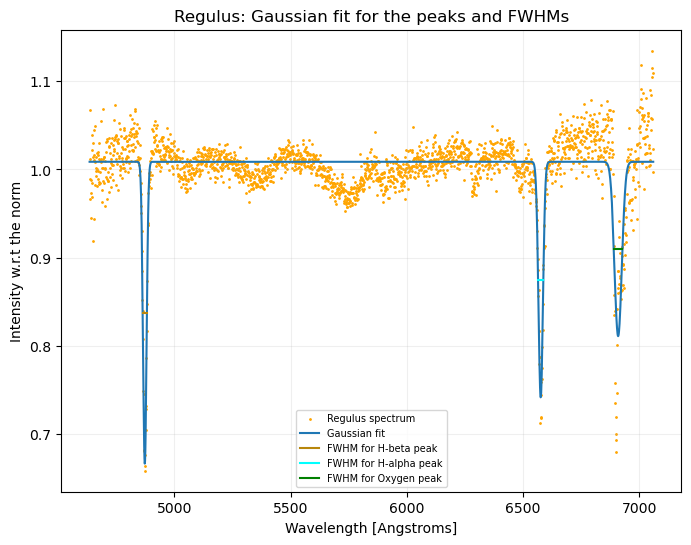

In [12]:
FWHM = np.array([2*np.abs(Peak[2])*np.sqrt(2*np.log(2)) for Peak in gaussian_params])
print(FWHM)

c=0
PeakDescriptions=["H-beta","H-alpha","Oxygen"]
PeakColors=["darkgoldenrod", "cyan", "green"]
for Peak in gaussian_params:
    print(f"{PeakDescriptions[c]} peak equivalent width: {FWHM[c]}")
    c+=1

print(f"Error in FWHMs: {fwhm_err}")

fig=figure(figsize=(8,6))
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range_a,sun_data, color="orange", label="Regulus spectrum",s=1)
frame.plot(x_range_a,f_superior(x_range_a, *beta), label="Gaussian fit")

p=0

PeakPositions = []
for Peak in gaussian_params:
    a,m,s=Peak
    PeakPositions.append(m)
    f=FWHM[p]
    fwhm_x=np.array((m-f/2,m+f/2))

    # getting the exponential fit data to know the y-coordinates of FWHM plot
    

    fwhm_y=np.array((a/2+z,a/2+z))

    frame.plot(fwhm_x,fwhm_y,color=PeakColors[p], label=f"FWHM for {PeakDescriptions[p]} peak")
    p+=1

frame.set_title("Regulus: Gaussian fit for the peaks and FWHMs")
frame.grid(alpha=0.2)
frame.set_ylabel("Intensity w.r.t the norm")
frame.set_xlabel("Wavelength [Angstroms]")
frame.legend(fontsize=7)
show()
close(fig)